<a href="https://colab.research.google.com/github/SShreya22/Wind_Turbine/blob/main/Wind_Turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install -q python-dotenv kaggle

In [34]:
from dotenv import load_dotenv
import os
from google.colab import drive
drive.mount('/content/drive')
load_dotenv("/content/drive/My Drive/Colab Notebooks/.env")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


True

In [35]:
# Define dataset directory
DATASET_DIR = "/content/wind_turbine/"
ZIP_FILE = "wind-turbine-power-generation-forecasting.zip"

In [36]:
if not os.path.exists(f"{DATASET_DIR}{ZIP_FILE}"):
    !kaggle datasets download -d gauravduttakiit/wind-turbine-power-generation-forecasting -p {DATASET_DIR}

!unzip -o {DATASET_DIR}{ZIP_FILE} -d {DATASET_DIR}

Archive:  /content/wind_turbine/wind-turbine-power-generation-forecasting.zip
  inflating: /content/wind_turbine/Dataset/Submission.csv  
  inflating: /content/wind_turbine/Dataset/Test.csv  
  inflating: /content/wind_turbine/Dataset/Train.xlsx  


In [37]:
import glob
import pandas as pd

# Search for CSV files inside ALL subfolders
csv_files = glob.glob(f"{DATASET_DIR}/**/*.csv", recursive=True)

if csv_files:
    print("✅ Found CSV file:", csv_files[0])  # Print the found file
    df = pd.read_csv(csv_files[0])  # Load the correct file
    print("Dataset loaded successfully!")
    df.head()
else:
    print("❌ No CSV file found in dataset folder!")


✅ Found CSV file: /content/wind_turbine/Dataset/Submission.csv
Dataset loaded successfully!


In [38]:
!ls -a
!git clone https://github.com/SShreya22/wind_turbine.git
%cd wind_turbine

.  ..  Dataset	wind-turbine-power-generation-forecasting.zip
Cloning into 'wind_turbine'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 30.35 KiB | 2.02 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/wind_turbine/wind_turbine


In [39]:
!pip install kaggle
import os
import pandas as pd
from dotenv import load_dotenv

!kaggle datasets download -d gauravduttakiit/wind-turbine-power-generation-forecasting
!unzip /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip -d /content/wind_turbine/

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/wind-turbine-power-generation-forecasting
License(s): CC0-1.0
  0% 0.00/11.7M [00:00<?, ?B/s]
100% 11.7M/11.7M [00:00<00:00, 147MB/s]
unzip:  cannot find or open /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip, /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip.zip or /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip.ZIP.


In [40]:
import pandas as pdy
df = pd.read_csv("/content/wind_turbine/Dataset/Test.csv")
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m
0,35040,01/01/17 0:00,1,19.6796,89.664205,17.072595,1.085389,0.867799,192.051683,233.057315,1.636515
1,35041,01/01/17 1:00,1,19.1796,90.664205,16.672595,1.665389,1.907799,183.051683,197.057315,2.736515
2,35042,01/01/17 2:00,1,19.5796,88.664205,16.672595,1.845389,2.867799,162.051683,167.057315,2.736515
3,35043,01/01/17 3:00,1,20.3796,85.664205,16.572595,2.325389,3.987799,166.051683,161.057315,2.936515
4,35044,01/01/17 4:00,1,21.0796,82.664205,16.572595,2.265389,4.047799,182.051683,170.057315,3.136515


In [41]:
#pattern = r'(\d{2}/\d{2}/\d{2})\s(\d{1,2}:\d{2})'      #pattern is a regular expression (regex) which is used to separate date and time from the column time. (\d{2}=2 digits,\s=space,\d{1,2}=1 or 2 digits)
#df[['Date', 'Hour']] = df['Time'].str.extract(pattern) #creating 2 new columns to store date and time separately, from the existing 'time' column and extracting the date and time from pattern.
#print(df.head(10))

In [42]:
#df=df.drop(columns=['Time']) #dropping the column time

In [43]:
print(df.shape)

(35040, 11)


In [44]:
data=df.to_string()
print(len(data))

4660452


In [45]:
df.isnull().sum()

,0
Unnamed: 0,0
Time,0
Location,0
Temp_2m,0
RelHum_2m,0
DP_2m,0
WS_10m,0
WS_100m,0
WD_10m,0
WD_100m,0


In [46]:
print(df.isnull().values.any())

False


In [47]:
print(df['WS_100m'].min(), df['WS_100m'].max())

0.107799417 22.84779942


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m', 'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [49]:
print(df.tail(5))

       Unnamed: 0            Time  Location   Temp_2m  RelHum_2m     DP_2m  \
35035       43795  31/12/17 19:00         4  0.406542   0.928571  0.521296   
35036       43796  31/12/17 20:00         4  0.404984   0.904762  0.513889   
35037       43797  31/12/17 21:00         4  0.401869   0.880952  0.507407   
35038       43798  31/12/17 22:00         4  0.401869   0.869048  0.503704   
35039       43799  31/12/17 23:00         4  0.401869   0.857143  0.500926   

         WS_10m   WS_100m    WD_10m   WD_100m    WG_10m  
35035  0.260898  0.288478  0.008357  0.022222  0.268293  
35036  0.305791  0.326297  0.000000  0.013889  0.257840  
35037  0.299935  0.328496  0.008357  0.022222  0.257840  
35038  0.299284  0.322779  0.002786  0.016667  0.254355  
35039  0.302537  0.337291  0.022284  0.033333  0.254355  


In [50]:
print(df.head(10))

   Unnamed: 0           Time  Location   Temp_2m  RelHum_2m     DP_2m  \
0       35040  01/01/17 0:00         1  0.362928   0.880952  0.461111   
1       35041  01/01/17 1:00         1  0.359034   0.892857  0.457407   
2       35042  01/01/17 2:00         1  0.362150   0.869048  0.457407   
3       35043  01/01/17 3:00         1  0.368380   0.833333  0.456481   
4       35044  01/01/17 4:00         1  0.373832   0.797619  0.456481   
5       35045  01/01/17 5:00         1  0.375389   0.809524  0.460185   
6       35046  01/01/17 6:00         1  0.356698   0.880952  0.452778   
7       35047  01/01/17 7:00         1  0.377726   0.857143  0.472222   
8       35048  01/01/17 8:00         1  0.404984   0.773810  0.487963   
9       35049  01/01/17 9:00         1  0.445483   0.690476  0.512963   

     WS_10m   WS_100m    WD_10m   WD_100m    WG_10m  
0  0.059857  0.033421  0.534819  0.650000  0.041812  
1  0.097593  0.079156  0.509749  0.550000  0.080139  
2  0.109304  0.121372  0.451253  0

In [51]:
df=df.drop(['Unnamed: 0'], axis=1)

In [52]:
df.head(7)

,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m
0,01/01/17 0:00,1,0.362928,0.880952,0.461111,0.059857,0.033421,0.534819,0.650000,0.041812
1,01/01/17 1:00,1,0.359034,0.892857,0.457407,0.097593,0.079156,0.509749,0.550000,0.080139
2,01/01/17 2:00,1,0.362150,0.869048,0.457407,0.109304,0.121372,0.451253,0.466667,0.080139
3,01/01/17 3:00,1,0.368380,0.833333,0.456481,0.140534,0.170624,0.462396,0.450000,0.087108
4,01/01/17 4:00,1,0.373832,0.797619,0.456481,0.136630,0.173263,0.506964,0.475000,0.094077
5,01/01/17 5:00,1,0.375389,0.809524,0.460185,0.136630,0.168426,0.490251,0.480556,0.080139
6,01/01/17 6:00,1,0.356698,0.880952,0.452778,0.156148,0.152595,0.373259,0.450000,0.108014


In [53]:
print(df.columns)  # List all columns
print(df.head())   # Show first 5 rows
print(df.info())   # Check data types and missing values

Index(['Time', 'Location', 'Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m',
       'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m'],
      dtype='object')
            Time  Location   Temp_2m  RelHum_2m     DP_2m    WS_10m   WS_100m  \
0  01/01/17 0:00         1  0.362928   0.880952  0.461111  0.059857  0.033421   
1  01/01/17 1:00         1  0.359034   0.892857  0.457407  0.097593  0.079156   
2  01/01/17 2:00         1  0.362150   0.869048  0.457407  0.109304  0.121372   
3  01/01/17 3:00         1  0.368380   0.833333  0.456481  0.140534  0.170624   
4  01/01/17 4:00         1  0.373832   0.797619  0.456481  0.136630  0.173263   

     WD_10m   WD_100m    WG_10m  
0  0.534819  0.650000  0.041812  
1  0.509749  0.550000  0.080139  
2  0.451253  0.466667  0.080139  
3  0.462396  0.450000  0.087108  
4  0.506964  0.475000  0.094077  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --

In [54]:
#creating a power_output column
#The power generated by a wind turbine is calculated as: P=(1/2)*(ρ=Air Density)*(A=Rotor Swept Area)*(V^3=Wind Speed)*(Cp=Power Coefficient)
# Assumptions: Air density ρ = 1.225 kg/m³, Rotor Area A = 100 m², Power Coefficient Cp = 0.4
df['Power_Output'] = 0.5 * 1.225 * 100 * (df['WS_100m'] ** 3) * 0.4

In [55]:
print(df.columns)

Index(['Time', 'Location', 'Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m',
       'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m', 'Power_Output'],
      dtype='object')


In [56]:
print(df[['WS_100m', 'Power_Output']].head())  # Check the relation between wind speed and power

    WS_100m  Power_Output
0  0.033421      0.000915
1  0.079156      0.012151
2  0.121372      0.043805
3  0.170624      0.121700
4  0.173263      0.127433


In [57]:
print(df['WS_100m'].describe())


count    35040.000000
mean         0.291590
std          0.131406
min          0.000000
25%          0.197010
50%          0.283641
75%          0.375110
max          1.000000
Name: WS_100m, dtype: float64


In [62]:
original_min_WS = 0.107799417
original_max_WS = 22.84779942
# Reverse scaling to get actual wind speeds
df['WS_100m_actual'] = df['WS_100m'] * (original_max_WS - original_min_WS) + original_min_WS

In [63]:
# Constants
air_density = 1.225  # kg/m³
rotor_area = 100  # m² (Assumed)
power_coefficient = 0.4  # Typical value

# Calculate Power Output
df['Power_Output'] = 0.5 * air_density * rotor_area * (df['WS_100m_actual'] ** 3) * power_coefficient


In [64]:
print(df[['WS_100m_actual', 'Power_Output']].head())


   WS_100m_actual  Power_Output
0        0.867799     16.011210
1        1.907799    170.123465
2        2.867799    577.846385
3        3.987799   1553.695833
4        4.047799   1624.886517


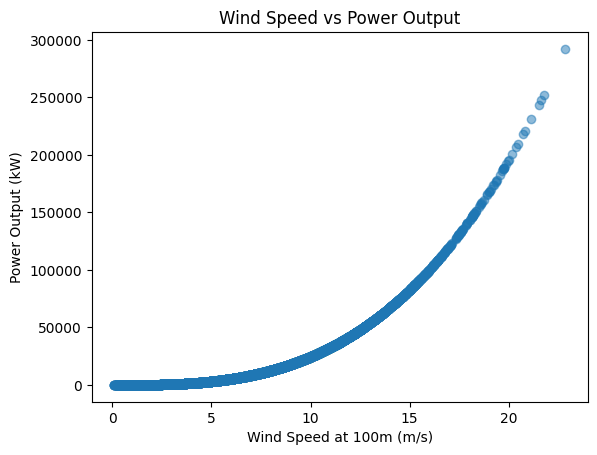

In [65]:
import matplotlib.pyplot as plt

plt.scatter(df['WS_100m_actual'], df['Power_Output'], alpha=0.5)
plt.xlabel('Wind Speed at 100m (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Wind Speed vs Power Output')
plt.show()